# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **South Lyon, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **South Lyon, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **South Lyon, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **South Lyon, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from scipy.interpolate import make_interp_spline

%matplotlib notebook

In [47]:
df_lyon = pd.read_csv('D:/Downloads/Coursera data science/Median Household Income (lyon).csv')
df_lyon.sort_values('Year', ascending=True, inplace=True)
df_lyon.head()

,ID Year,Year,Household Income by Race,Household Income by Race Moe,Geography,ID Geography,Slug Geography
47,2013,2013,70811,2162.0,"Oakland County (West) PUMA, MI",79500US2602901,oakland-county-west-puma-mi
42,2013,2013,53046,89.0,United States,01000US,united-states
43,2013,2013,48411,163.0,Michigan,04000US26,michigan
46,2013,2013,51844,241.0,"Detroit-Warren-Dearborn, MI",31000US19820,detroit-warren-dearborn-mi
45,2013,2013,54895,7036.0,"South Lyon, MI",16000US2675100,south-lyon-mi


In [48]:
df_ann = pd.read_csv('D:/Downloads/Coursera data science/Median Household Income (ann).csv')
df_ann.sort_values('Year', ascending=True, inplace=True)
df_ann.head()

,ID Year,Year,Household Income by Race,Household Income by Race Moe,Geography,ID Geography,Slug Geography
55,2013,2013,50369,1535.0,"Washtenaw County (East Central, Outside Ann Ar...",79500US2602703,washtenaw-county-east-central-outside-ann-arbo...
49,2013,2013,53046,89.0,United States,01000US,united-states
50,2013,2013,48411,163.0,Michigan,04000US26,michigan
54,2013,2013,55471,1804.0,"Ann Arbor City Area PUMA, MI",79500US2602702,ann-arbor-city-area-puma-mi
52,2013,2013,59055,985.0,"Ann Arbor, MI",31000US11460,ann-arbor-mi-31000US11460


In [49]:
df_lyon.columns = df_lyon.columns.str.strip()
df_ann.columns = df_ann.columns.str.strip()

In [51]:
df_lyon = df_lyon[df_lyon['Geography'] == 'South Lyon, MI']
df_lyon

,ID Year,Year,Household Income by Race,Household Income by Race Moe,Geography,ID Geography,Slug Geography
45,2013,2013,54895,7036.0,"South Lyon, MI",16000US2675100,south-lyon-mi
39,2014,2014,55889,6893.0,"South Lyon, MI",16000US2675100,south-lyon-mi
33,2015,2015,61523,3106.0,"South Lyon, MI",16000US2675100,south-lyon-mi
27,2016,2016,62523,4458.0,"South Lyon, MI",16000US2675100,south-lyon-mi
21,2017,2017,63876,4358.0,"South Lyon, MI",16000US2675100,south-lyon-mi
15,2018,2018,67327,5429.0,"South Lyon, MI",16000US2675100,south-lyon-mi
9,2019,2019,73200,6865.0,"South Lyon, MI",16000US2675100,south-lyon-mi
3,2020,2020,74300,6161.0,"South Lyon, MI",16000US2675100,south-lyon-mi


In [118]:
df_ann = df_ann[df_ann['Geography'] == 'Ann Arbor, MI']
df_ann.reset_index(drop=True, inplace=True)

In [42]:
df_property_lyon = pd.read_csv('D:/Downloads/Coursera data science/Property Value (lyon).csv')
df_property_lyon = df_property_lyon[df_property_lyon['Geography'] == 'South Lyon, MI'].sort_values('Year', ascending=True)
df_property_lyon

,ID Year,Year,Property Value,Property Value Moe,Geography,ID Geography,Slug Geography
45,2013,2013,151400,7711.0,"South Lyon, MI",16000US2675100,south-lyon-mi
39,2014,2014,145900,10771.0,"South Lyon, MI",16000US2675100,south-lyon-mi
33,2015,2015,152000,8534.0,"South Lyon, MI",16000US2675100,south-lyon-mi
27,2016,2016,161100,10319.0,"South Lyon, MI",16000US2675100,south-lyon-mi
21,2017,2017,171100,10548.0,"South Lyon, MI",16000US2675100,south-lyon-mi
15,2018,2018,178400,15943.0,"South Lyon, MI",16000US2675100,south-lyon-mi
9,2019,2019,192100,20283.0,"South Lyon, MI",16000US2675100,south-lyon-mi
3,2020,2020,207700,20500.0,"South Lyon, MI",16000US2675100,south-lyon-mi


In [117]:
df_property_ann = pd.read_csv('D:/Downloads/Coursera data science/Property Value (ann).csv')
df_property_ann = df_property_ann[df_property_ann['Geography'] == 'Ann Arbor City Area PUMA, MI'].sort_values('Year', ascending=True)
df_property_ann.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>


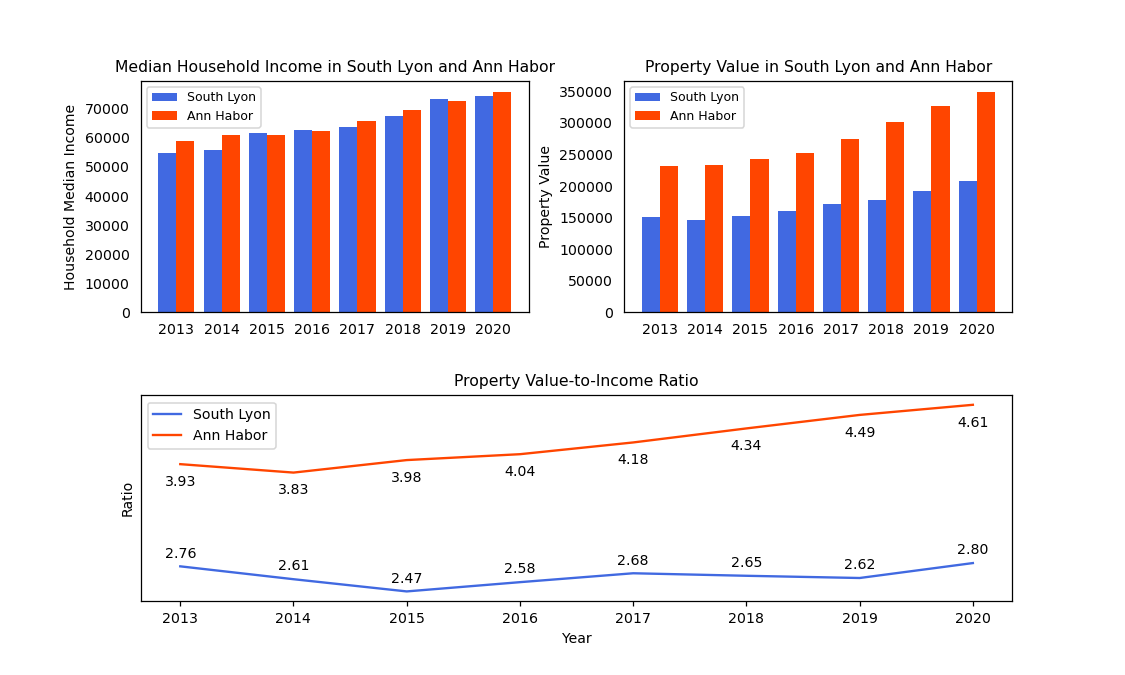

In [175]:
x = np.arange(len(df_lyon))

gs = GridSpec(20,20)
plt.figure(figsize=(10,6))
ax1 = plt.subplot(gs[:9,:9])
ax1.bar(x-0.2, df_lyon['Household Income by Race'], width=0.4, color='royalblue', label='South Lyon')
ax1.bar(x+0.2, df_ann['Household Income by Race'], width = 0.4, color='orangered', label='Ann Habor')
ax1.set_xticks(x, df_lyon['Year'], fontsize=10)
ax1.set_ylabel('Household Median Income', fontsize=9)
ax1.set_title('Median Household Income in South Lyon and Ann Habor', fontsize=10)
ax1.tick_params(labelsize=9, bottom=False, left=False)
plt.legend(loc=2, fontsize=8)


ax2 = plt.subplot(gs[:9,11:])
ax2.bar(x-0.2, df_property_lyon['Property Value'], width=0.4, color='royalblue', label='South Lyon')
ax2.bar(x+0.2, df_property_ann['Property Value'], width = 0.4, color='orangered', label='Ann Habor')
ax2.set_xticks(x, df_lyon['Year'], fontsize=10)
ax2.set_ylabel('Property Value', fontsize=9)
ax2.set_title('Property Value in South Lyon and Ann Habor', fontsize=10)
ax2.tick_params(labelsize=9, bottom=False, left=False)
plt.legend(loc=2, fontsize=8)


x = np.array(df_lyon['Year'])
y_lyon = np.array(df_property_lyon['Property Value']/df_lyon['Household Income by Race'])
y_ann = np.array(df_property_ann['Property Value']/df_ann['Household Income by Race'])

ax3 = plt.subplot(gs[12:,:])
ax3.plot(x, y_lyon, color='royalblue', label='South Lyon')
ax3.plot(x, y_ann, color='orangered', label='Ann Habor' )
ax3.set_title('Property Value-to-Income Ratio', fontsize=10)
ax3.tick_params(labelsize=9, left=False, labelleft=False)
ax3.set_ylabel('Ratio', fontsize=9)
plt.legend(loc=2, fontsize=9)
ax3.set_xlabel('Year', fontsize=9)
for i in range(len(x)):
    ax3.annotate('%.2f'%y_lyon[i], (x[i], y_lyon[i]+0.1), ha='center', fontsize=9)
    ax3.annotate('%.2f'%y_ann[i], (x[i], y_ann[i]-0.25), ha='center', fontsize=9)


The bar graph above was regarding the recent median household income, property value and ratio among these both factors in South Lyon, Michigan over 8 years from year 2013 to 2020. Data from Ann Habor, Michigan was visualized to do a comparison with South Lyon. Household income is defined as the total gross income of all people occupying the same housing unit who are 15 years and older.The median is used for household income because it represents a more accurate representation of the area than a mean number. The line graph above shown the recent property value-income ratio for both city in South Lyon and Ann Habor.

Both of bar graphs indicated the steady increases in median household income and property value in South Lyon and Ann Habor from 2013 to 2020. Median household income and property value in South Lyon were lower compared to Ann Habor. Thus, the property value-to-income ratio in South Lyon is much lower than Ann Habor. The line graph shown that property value-to-income ratio in Ann Habor increases from 3.93 in 2013 until 4.61 in 2020, but that ratio in South Lyon didn't much affected for these 8 years which was around 2.80 in 2020.

